# SMS Spam Detection

Berikut ini akan dilakukan salah satu implementasi dari algoritma naive Bayes, yaitu dalam pengklasifikasian suatu SMS apakah termasuk kelompok spam atau bukan.
Untuk memabantu dalam processing data berupa text, kita akan menggunakan salah satu package yang disediakan oleh Python untuk melakukan text processing, yaitu nltk (Natural Language Tool Kit), yang biasanya digunakan untuk melakukan nlp (Natural Language Processing).

## 1. Pemgimportan Package dan Dataset

Berikut adalah proses pengimportan package yang dibutuhkan selama proses pengolahan data dan pembuatan model nantinya. Dan juga proses pengimportan data yang akan digunakan untuk pemodelan. Sumber dari data sendiri diambil dari website Kaggle.

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')

## 2. Data Preprocessing

Pada proses kali ini, kita akan melakukan beberapa proses untuk mengolah data yang telah diimport sehingga bisa digunakan, antara lain:
+ checking missing value
+ checking description of the data
+ checking inbalance label
+ data cleansing

In [3]:
df = df[['v2', 'v1']]
df.rename(columns={'v2': 'messages', 'v1': 'category'}, inplace=True)

In [4]:
df.isnull().sum()

messages    0
category    0
dtype: int64

In [5]:
df.describe(include='all')

,messages,category
count,5572,5572
unique,5169,2
top,"Sorry, I'll call later",ham
freq,30,4825


In [6]:
words = set(stopwords.words('english'))

def cleaning_text(text):
    text = text.lower()
    text = re.sub(r'[^0-9a-zA-Z]', ' ', text)
    text = " ".join(word for word in text.split() if word not in words)
    return text

In [7]:
df['clean_messages'] = df['messages'].apply(cleaning_text)
df_clean = df[['clean_messages', 'category']]
df_clean.head()

,clean_messages,category
0,go jurong point crazy available bugis n great ...,ham
1,ok lar joking wif u oni,ham
2,free entry 2 wkly comp win fa cup final tkts 2...,spam
3,u dun say early hor u c already say,ham
4,nah think goes usf lives around though,ham


In [8]:
df.groupby('category').count()

,messages,clean_messages
category,,
ham,4825,4825
spam,747,747


## 3. Proses Modeling Machine Learning

Selanjutnya adalah proses modeling machine learning. Beberapa proses yang akan dilakukan diantaranya:
+ splitting data ke dalam training dan testing dataset (feature dan label)
+ membuat model dengan memanggil algoritma naive Bayes dan melakukan fitting training dataset ke model
+ melakukan evaluasi model dengan cross-validation, confusion matrix, dan classification report
+ menguji coba model dengan dataset buatan

In [9]:
X = df_clean['clean_messages']
y = df['category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [10]:
from sklearn.naive_bayes import MultinomialNB

multi = MultinomialNB()
multi.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

In [11]:
pipe_model = Pipeline([('vect', CountVectorizer()),
                        ('tfidf', TfidfTransformer()),
                        ('model', multi)
                        ])
model = pipe_model.fit(X_train, y_train)

In [12]:
prediction = model.predict(X_test)

In [13]:
acc = accuracy_score(prediction, y_test)
print("Score of model: {}".format(acc))

Score of model: 0.9669777458722182


In [14]:
scoring = ['precision_macro', 'recall_macro', 'f1_macro']

scores = cross_validate(model, X, y, cv=5, scoring=scoring)
print("Precision:", scores['test_precision_macro'])
print("Recall:", scores['test_recall_macro'])
print("F1 score:", scores['test_f1_macro'])

Precision: [0.98590131 0.98153693 0.98105683 0.98201798 0.98298298]
Recall: [0.90666667 0.87666667 0.87248322 0.87919463 0.88590604]
F1 score: [0.94137926 0.92025261 0.91726861 0.92214206 0.92695026]


AttributeError: 'Pipeline' object has no attribute 'classes'

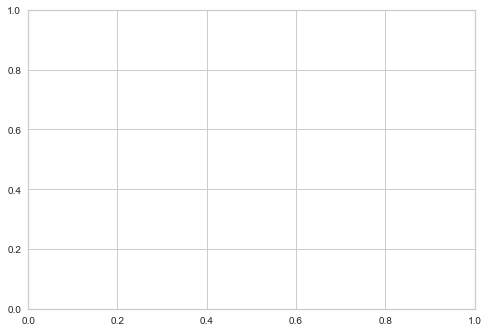

In [15]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(model)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

In [ ]:
from yellowbrick.classifier import ClassificationReport

cr = ClassificationReport(model, support=True)
cr.fit(X_train, y_train)
cr.score(X_test, y_test)
cr.show()

In [ ]:
new_dataset = np.array(['free weekly', 'get free ticket for fifa worldcup'])

model.predict(new_dataset)